This notebook is all about learning and experimenting Unsupervised Learning (on famous Iris Dataset)
Unsupervised Learning indetified patterns in data sets containing data points that are neither classified nor labeled
## You'll find: 

1- <a href="#eda">EDA</a>

2-  <a href="#1">Adjusting the Dataset for Unsupervised Learning</a>

3-  <a href="#2">Implemeting the K Means Clustering</a>

4-  <a href="#3">Finding the best amount of clusters to get most accurate results (KMeans)</a>

5-  <a href="#4">Implemeting the Hierarchical Clustering</a>

6-  <a href="#5">Finding the best amount of clusters to get most accurate results (Hierarchy)</a>

7-  <a href="#6">Evaluating the Results and Comparing them</a>

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import warnings
warnings.filterwarnings("ignore")

<div id="eda"></div>
# **BASIC EDA**

In [3]:
df = pd.read_csv("E:/Documents/Personal Learning/AI Undergrad 2023/Lectures/Unsupervised Learning/Iris.csv")   # reading the data

In [4]:
df.head()    # first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


Removing useless columns

Id column is not a real feature of the flowers. 

In [5]:
df.drop(["Id"],axis=1,inplace=True)    # dropped

df.head()   # first few rows

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
df.info()   # all non-null and numeric [except the labels]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

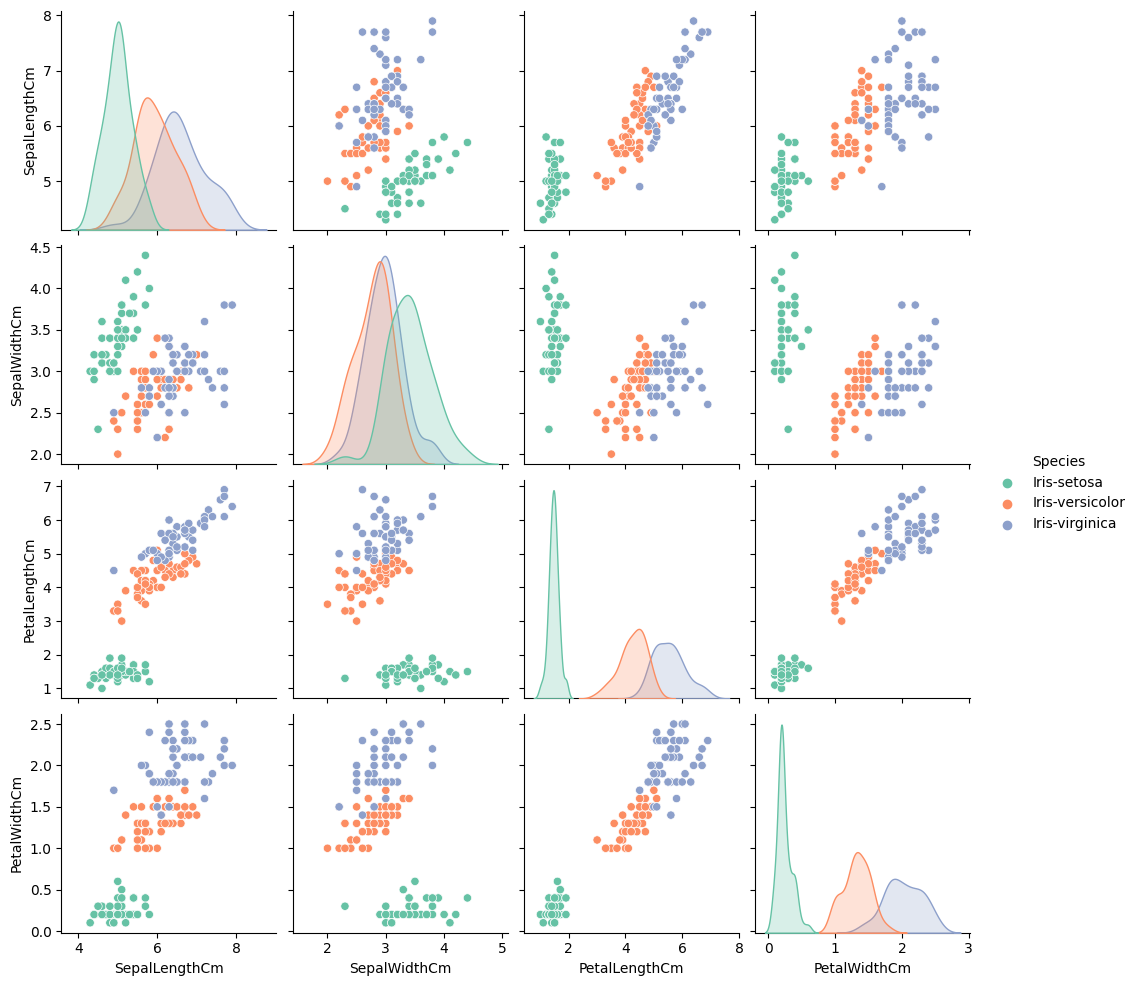

In [8]:
sns.pairplot(data=df,hue="Species",palette="Set2")
plt.show()

### We see that iris-setosa is easily separable from the other two. Especially when we can see in different colors for corresponding Labels like above.

### But our mission was finding the Labels that we didn't know at all, So Let's create a suitable scenario.

<div id="1"></div>
# ** Adjusting the Dataset for Unsupervised Learning **

### I will not use labels column on the *"new"* Dataset

### This helps not give prior labels to the ML algorithm

In [9]:
features = df.loc[:,["SepalLengthCm","SepalWidthCm","PetalLengthCm","PetalWidthCm"]]

### From now on, we don't know the real labels or amount of labels anymore (Shhh!)

<div id="2"></div>
# ** Implemeting the K Means Clustering **

### Implement SciKit-Learn 

### Using the Kmeans clustering to figure out labels

In [10]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=99)        # 99 CLUSTERS ?????

### WHY 99 ????? Because I don't know the right amount of Labels. Don't worry, There is a solution for it.


<div id="3"></div>
# **Finding the best amount of clusters to get most accurate results (KMeans) **

### I will use ELBOW RULE, which is basically looking for a plot line that respectively has a slope nearest to 90 degrees compared to y axis and be smallest possible. (yes, looks like an elbow )

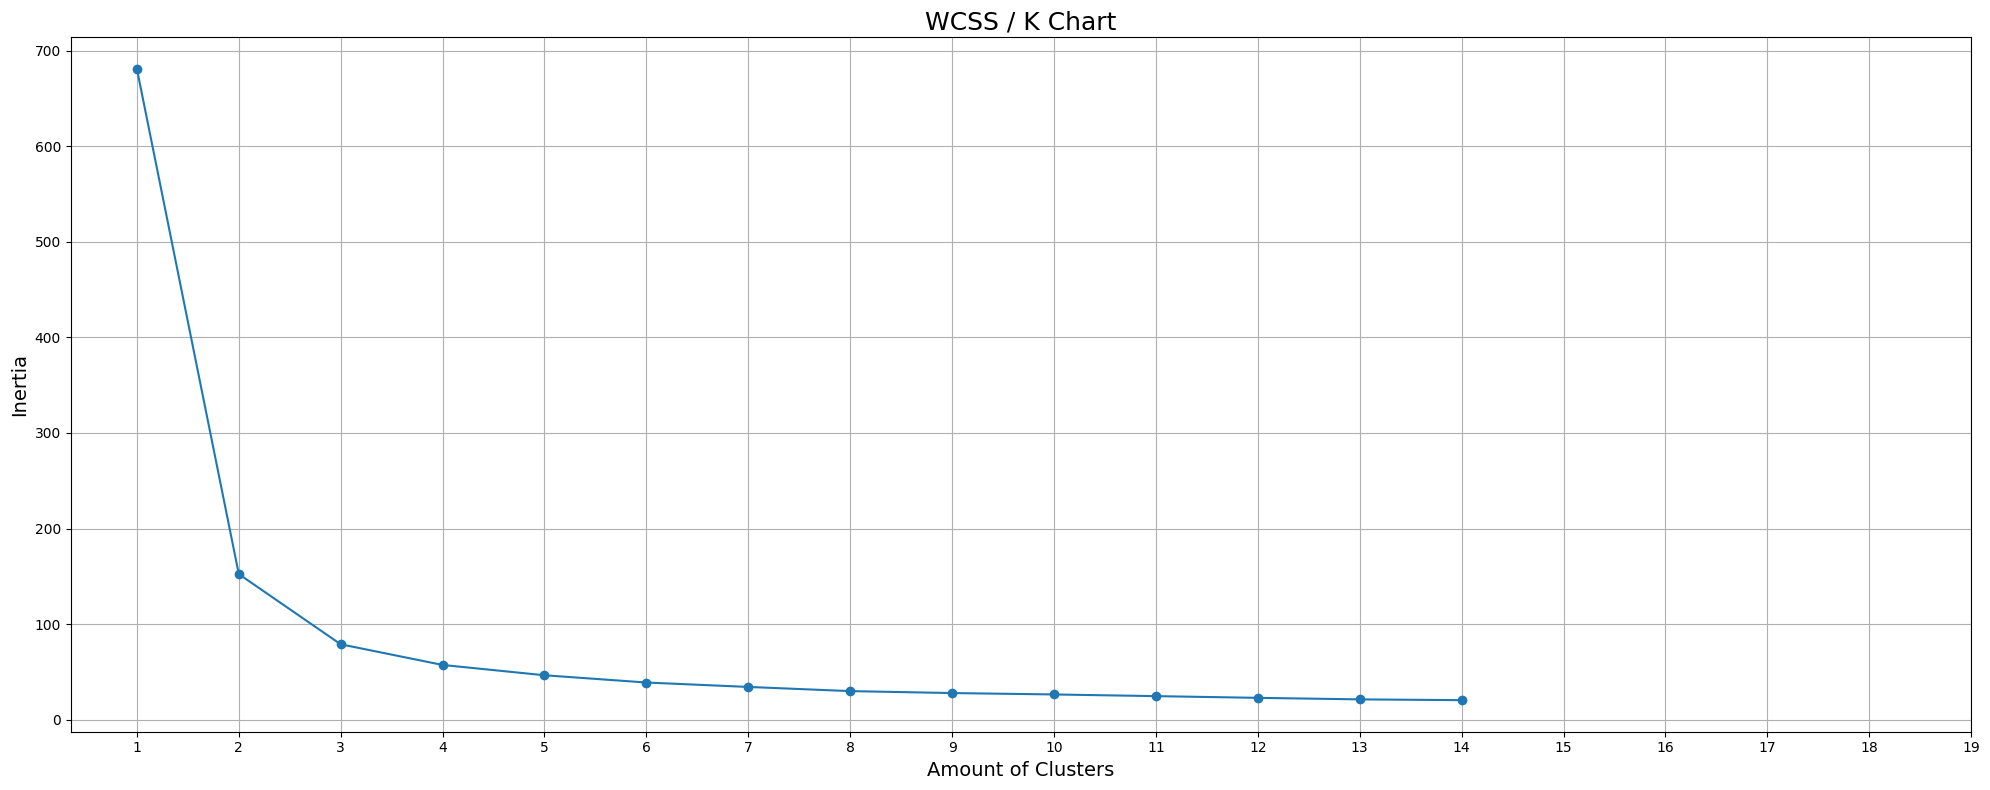

In [11]:
from sklearn.cluster import KMeans
wcss = []

for k in range(1,15):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(features)
    wcss.append(kmeans.inertia_)


plt.figure(figsize=(20,8))
plt.title("WCSS / K Chart", fontsize=18)
plt.plot(range(1,15),wcss,"-o")
plt.grid(True)
plt.xlabel("Amount of Clusters",fontsize=14)
plt.ylabel("Inertia",fontsize=14)
plt.xticks(range(1,20))
plt.tight_layout()
plt.show()


### **3 or 2** seems to be our ** Best ** value(s) for clusters. (By the ** Elbow Rule**)

## Let's Double Check it 

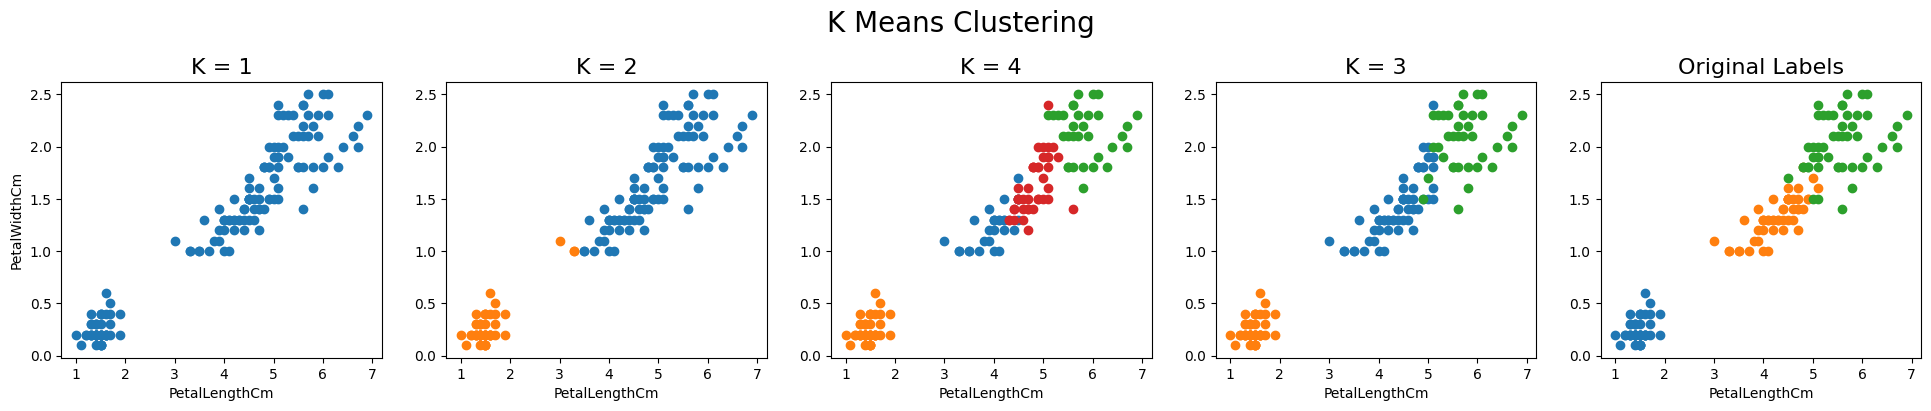

In [12]:
plt.figure(figsize=(24,4))

plt.suptitle("K Means Clustering",fontsize=20)


plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.PetalLengthCm,features.PetalWidthCm)


plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=2)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=3)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
kmeans = KMeans(n_clusters=4)
features["labels"] = kmeans.fit_predict(features)
plt.scatter(features.PetalLengthCm[features.labels == 0],features.PetalWidthCm[features.labels == 0])
plt.scatter(features.PetalLengthCm[features.labels == 1],features.PetalWidthCm[features.labels == 1])
plt.scatter(features.PetalLengthCm[features.labels == 2],features.PetalWidthCm[features.labels == 2])
plt.scatter(features.PetalLengthCm[features.labels == 3],features.PetalWidthCm[features.labels == 3])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(df.PetalLengthCm[df.Species == "Iris-setosa"],df.PetalWidthCm[df.Species == "Iris-setosa"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-versicolor"],df.PetalWidthCm[df.Species == "Iris-versicolor"])
plt.scatter(df.PetalLengthCm[df.Species == "Iris-virginica"],df.PetalWidthCm[df.Species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()

### Kmeans visibly did an amazing job with **3** clusters. Except few data points, I can say prediction is identical to the original with labels. Which shows that our ELBOW chart was right.

<div id="4"></div>
# ** Implemeting the Hierarchical Clustering**

### Again, Super Simple with SciKit-Learn. 

In [13]:
from sklearn.cluster import AgglomerativeClustering
hc_cluster = AgglomerativeClustering(n_clusters=99)    # 99 CLUSTERS ????? 

### AGAIN 99 ????? Yes, Because I don't know the right amount of Labels. Again, There is also solution for it.
<div id="5"></div>
# **Finding the best amount of clusters to get most accurate results (Hierarchy)**

### Longest Vertical line between Horizontal Lines.

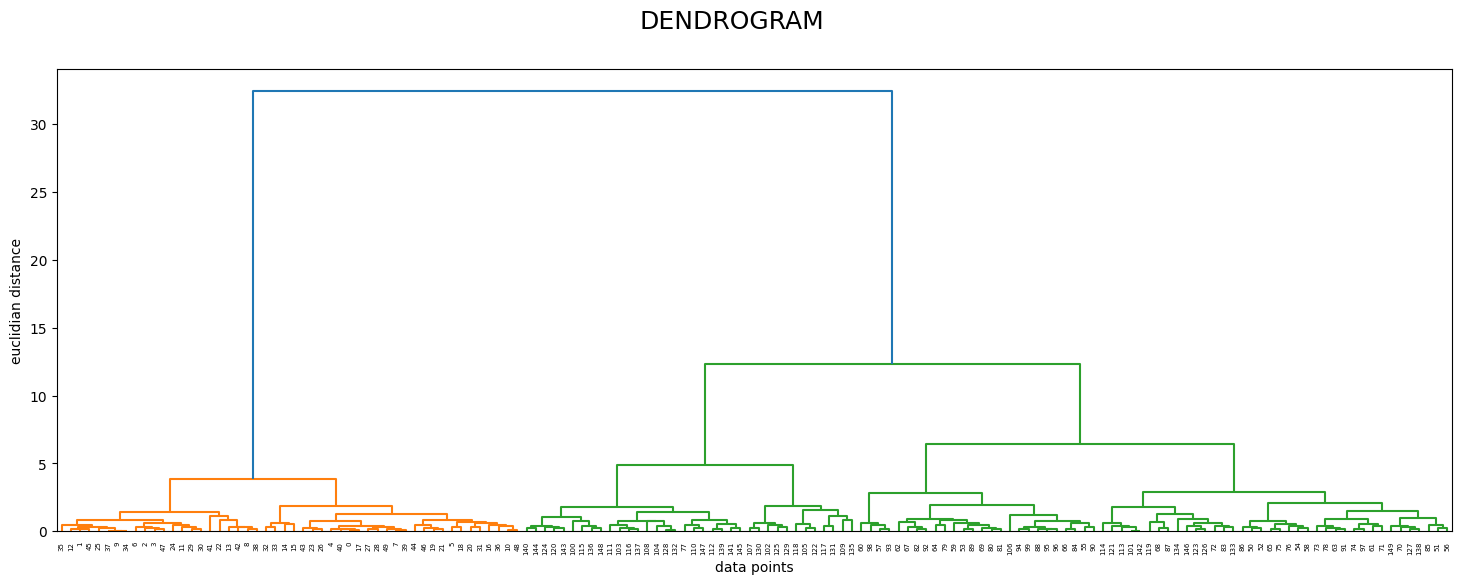

In [14]:
from scipy.cluster.hierarchy import dendrogram, linkage

merg = linkage(features,method="ward")

plt.figure(figsize=(18,6))
dendrogram(merg, leaf_rotation=90)
plt.xlabel("data points")
plt.ylabel("euclidian distance")

plt.suptitle("DENDROGRAM",fontsize=18)
plt.show()

### we see that longest vertical line without any perpendecular matching lines (euclidian distances). If we draw a horizontal line between that values, we will have ** 2 or 3 ** interceptions which are representing ideal amount of labels.



## Double Check!

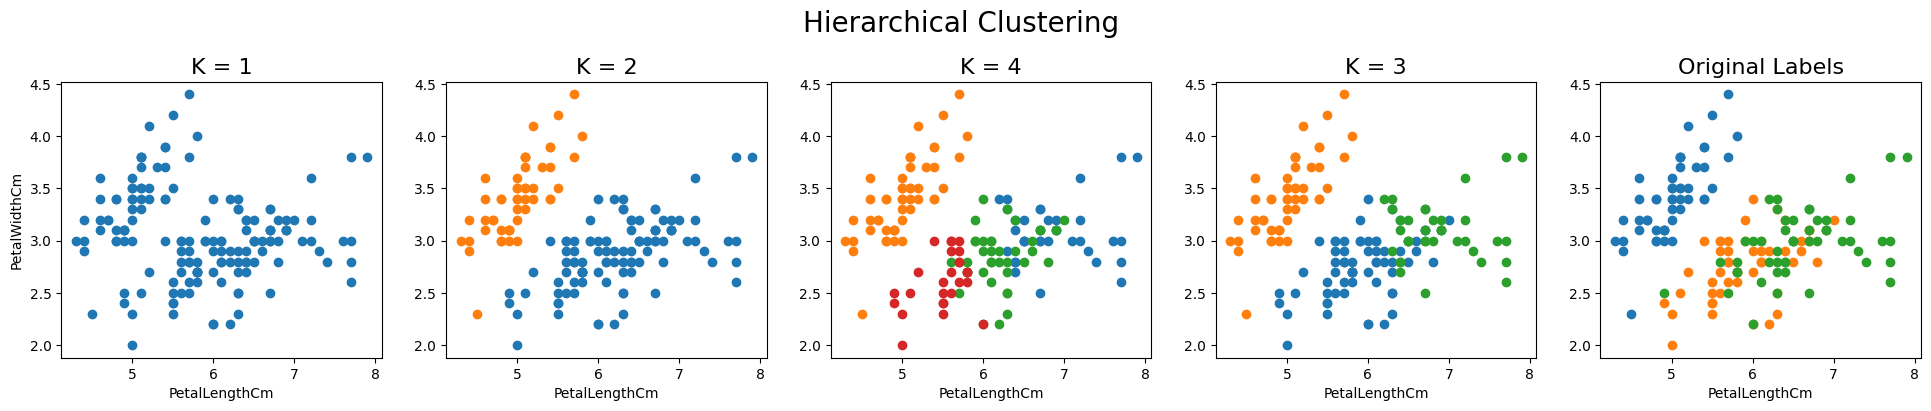

In [15]:
plt.figure(figsize=(24,4))

plt.suptitle("Hierarchical Clustering",fontsize=20)

plt.subplot(1,5,1)
plt.title("K = 1",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.ylabel("PetalWidthCm")
plt.scatter(features.SepalLengthCm,features.SepalWidthCm)


plt.subplot(1,5,2)
plt.title("K = 2",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=2)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,3)
plt.title("K = 4",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=4)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])
plt.scatter(features.SepalLengthCm[features.labels == 2],features.SepalWidthCm[features.labels == 2])
plt.scatter(features.SepalLengthCm[features.labels == 3],features.SepalWidthCm[features.labels == 3])

# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

plt.subplot(1,5,4)
plt.title("K = 3",fontsize=16)
plt.xlabel("PetalLengthCm")
hc_cluster = AgglomerativeClustering(n_clusters=3)
features["labels"] = hc_cluster.fit_predict(features)
plt.scatter(features.SepalLengthCm[features.labels == 0],features.SepalWidthCm[features.labels == 0])
plt.scatter(features.SepalLengthCm[features.labels == 1],features.SepalWidthCm[features.labels == 1])
plt.scatter(features.SepalLengthCm[features.labels == 2],features.SepalWidthCm[features.labels == 2])


plt.subplot(1,5,5)
plt.title("Original Labels",fontsize=16)
plt.xlabel("PetalLengthCm")
plt.scatter(df.SepalLengthCm[df.Species == "Iris-setosa"],df.SepalWidthCm[df.Species == "Iris-setosa"])
plt.scatter(df.SepalLengthCm[df.Species == "Iris-versicolor"],df.SepalWidthCm[df.Species == "Iris-versicolor"])
plt.scatter(df.SepalLengthCm[df.Species == "Iris-virginica"],df.SepalWidthCm[df.Species == "Iris-virginica"])

plt.subplots_adjust(top=0.8)
plt.show()

### Again, Our double checking method showed that **3** is more accurate than ** 2 ** value by simply looking to the graph above. 

### Reason behind this is basically "iris-setosa" being too easy to separate while the other two is quite mixed and it made our Dendrogram method a bit unclear.

<div id="6"></div>
# ** Evaluating the Results and Comparing them**

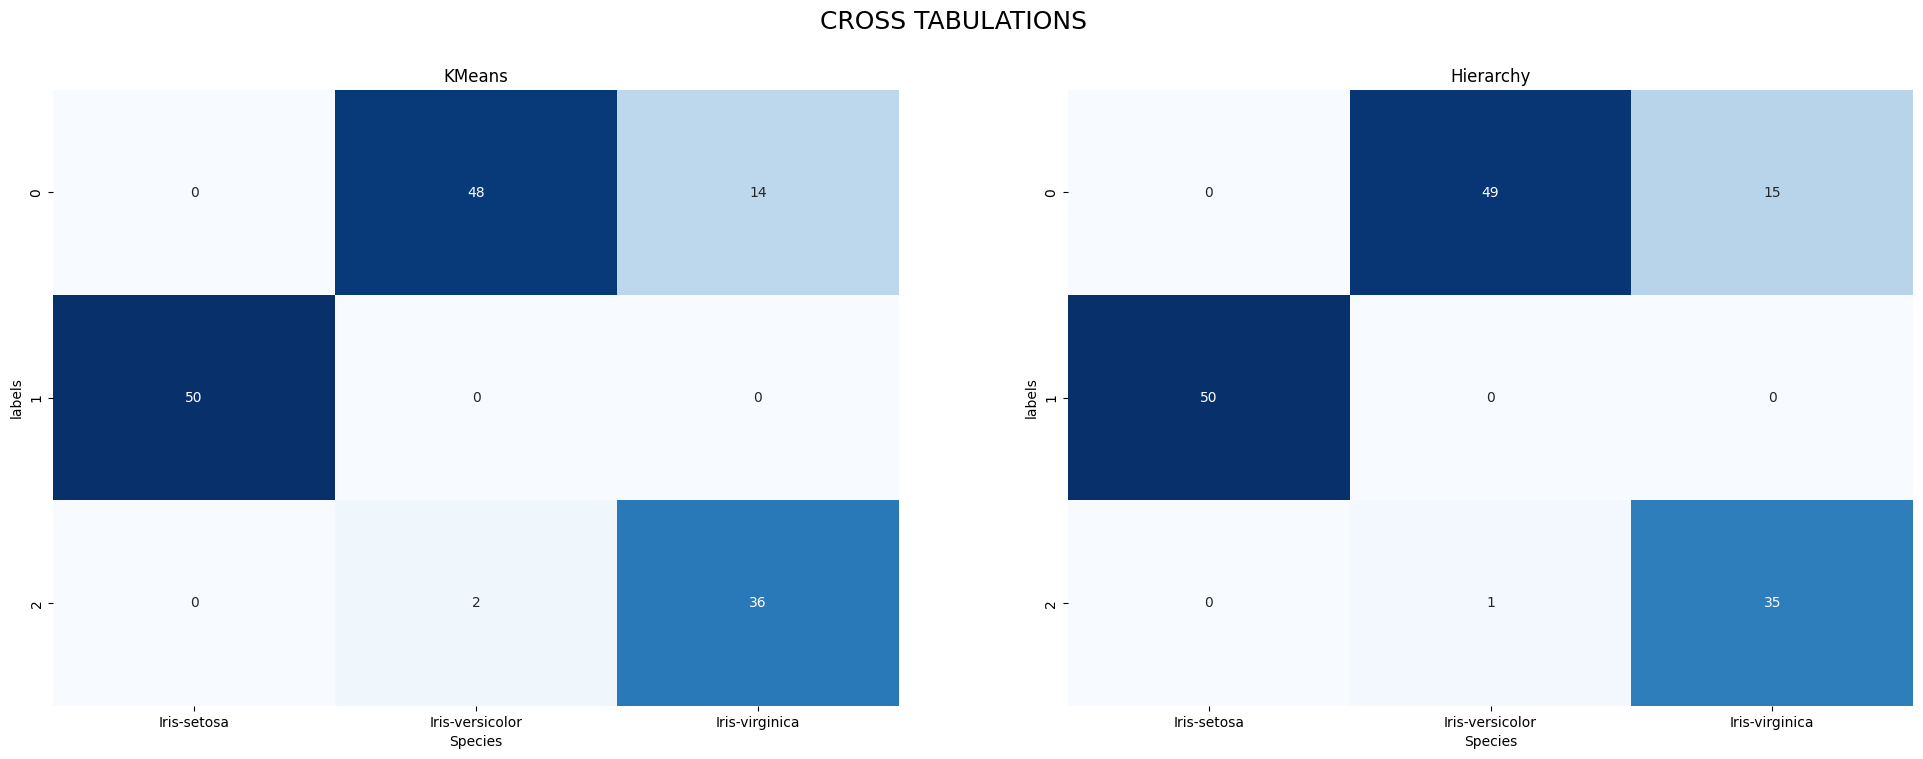

In [16]:
# I drop labels since we only want to use features.
features.drop(["labels"],axis=1,inplace=True)

# kmeans
kmeans = KMeans(n_clusters=3)
kmeans_predict = kmeans.fit_predict(features)

# cross tabulation table for kmeans
df1 = pd.DataFrame({'labels':kmeans_predict,"Species":df['Species']})
ct1 = pd.crosstab(df1['labels'],df1['Species'])


# hierarchy
hc_cluster = AgglomerativeClustering(n_clusters=3)
hc_predict = hc_cluster.fit_predict(features)

# cross tabulation table for Hierarchy
df2 = pd.DataFrame({'labels':hc_predict,"Species":df['Species']})
ct2 = pd.crosstab(df2['labels'],df2['Species'])


plt.figure(figsize=(24,8))
plt.suptitle("CROSS TABULATIONS",fontsize=18)
plt.subplot(1,2,1)
plt.title("KMeans")
sns.heatmap(ct1,annot=True,cbar=False,cmap="Blues")

plt.subplot(1,2,2)
plt.title("Hierarchy")
sns.heatmap(ct2,annot=True,cbar=False,cmap="Blues")

plt.show()

# **Conclusion**

### Both methods Failed on 16 data points over 150 data points, which is equal to 90% accuracy

### Clustering "iris-setosa" was easy for both of them (50/50 success) because it's data points are all easily differentiable

### 15 mistakes of all 16 is coming from "iris-virginica". Which shows that it was hard to cluster for my models.

